# Subset Statistics
Use this script to analyze the presence of users and interactions in the filtered subsets. Adapt the variables below to adapt to different age groupings or datasets.

In [1]:
dataset = 'ml' # 'ml', 'mlhd', or 'bx'
weighted = True
age_type = 'all_ages'

In [2]:
import utils.age_processing as ap
import os
import ast
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from dotenv import load_dotenv
from pathlib import Path
env_path = Path('..') / 'config.env'
load_dotenv(dotenv_path=env_path)
dataset_dir = os.getenv("dataset_directory")

In [4]:
ages_sort = ap.get_sorted_ages(dataset, age_type)

In [5]:
genres = []

if dataset == 'ml':
    data_dir = dataset_dir + '/processed/movielens-1m'
    with open('../utils/ML_genres.txt', 'r') as f:
        for line in f:
            genres.append(line.strip())
elif dataset == 'mlhd':
    data_dir = dataset_dir + '/processed/mlhd_sampled_filtered'
    with open('../utils/MLHD_genres.txt', 'r') as f:
        for line in f:
            genres.append(line.strip())
elif dataset == 'bx':
    data_dir = dataset_dir + '/processed/Book-Crossing'
    with open('../utils/BX_genres.txt', 'r') as f:
        for line in f:
            genres.append(line.strip())



In [6]:
user_profile_stats_path = data_dir + f'/user_profile_stats{"_weighted" if weighted else ""}.tsv'
user_path = data_dir + '/users.tsv'
interactions_path = data_dir + '/interactions.tsv.bz2'
if dataset == 'ml':
    items_path = data_dir + '/movies.tsv'
elif dataset == 'mlhd':
    items_path = data_dir + '/tracks.tsv'
    artists_path = data_dir + '/artists.tsv'
elif dataset == 'bx':
    items_path = data_dir + '/books.tsv'

users = pd.read_csv(user_path, sep='\t')
user_stats = pd.read_csv(user_profile_stats_path, sep='\t')
user_stats['normalized_genre_distribution'] = user_stats['normalized_genre_distribution'].apply(ast.literal_eval)


user_stats['age_group'] = user_stats['age'].apply(lambda x: ap.age_group(x, dataset, age_type))
user_stats['age_group'] = pd.Categorical(user_stats['age_group'], categories=ages_sort, ordered=True)

grouped_user_stats = user_stats.groupby('age_group')

C:\Users\rungruh\AppData\Local\Temp\ipykernel_16904\3351963962.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_user_stats = user_stats.groupby('age_group')


In [7]:
num_users = len(user_stats)
for age, group in grouped_user_stats:
    print(f"Age group: {age}")
    print(f"Number of users: {len(group)}")
    print(f"percentage of total users: {len(group) / num_users * 100:.2f}%")
    print(f"Average number of interactions: {group['num_interactions'].mean()}")

Age group: Under 18
Number of users: 222
percentage of total users: 3.68%
Average number of interactions: 122.56756756756756
Age group: 18-24
Number of users: 1103
percentage of total users: 18.26%
Average number of interactions: 166.39709882139618
Age group: 25-34
Number of users: 2096
percentage of total users: 34.70%
Average number of interactions: 188.71946564885496
Age group: 35-44
Number of users: 1193
percentage of total users: 19.75%
Average number of interactions: 166.80888516345348
Age group: 45-49
Number of users: 550
percentage of total users: 9.11%
Average number of interactions: 152.06
Age group: 50-55
Number of users: 496
percentage of total users: 8.21%
Average number of interactions: 146.1491935483871
Age group: 56+
Number of users: 380
percentage of total users: 6.29%
Average number of interactions: 102.05263157894737


## Profile Size Distribution

C:\Users\rungruh\AppData\Local\Temp\ipykernel_16904\4018935642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interactions_per_age = user_stats.groupby('age_group')['num_interactions'].sum().to_dict()
C:\Users\rungruh\AppData\Local\Temp\ipykernel_16904\4018935642.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels)


Age group: Under 18, Number of ratings: 27210, Percentage: 2.72%
Age group: 18-24, Number of ratings: 183536, Percentage: 18.35%
Age group: 25-34, Number of ratings: 395556, Percentage: 39.55%
Age group: 35-44, Number of ratings: 199003, Percentage: 19.90%
Age group: 45-49, Number of ratings: 83633, Percentage: 8.36%
Age group: 50-55, Number of ratings: 72490, Percentage: 7.25%
Age group: 56+, Number of ratings: 38780, Percentage: 3.88%


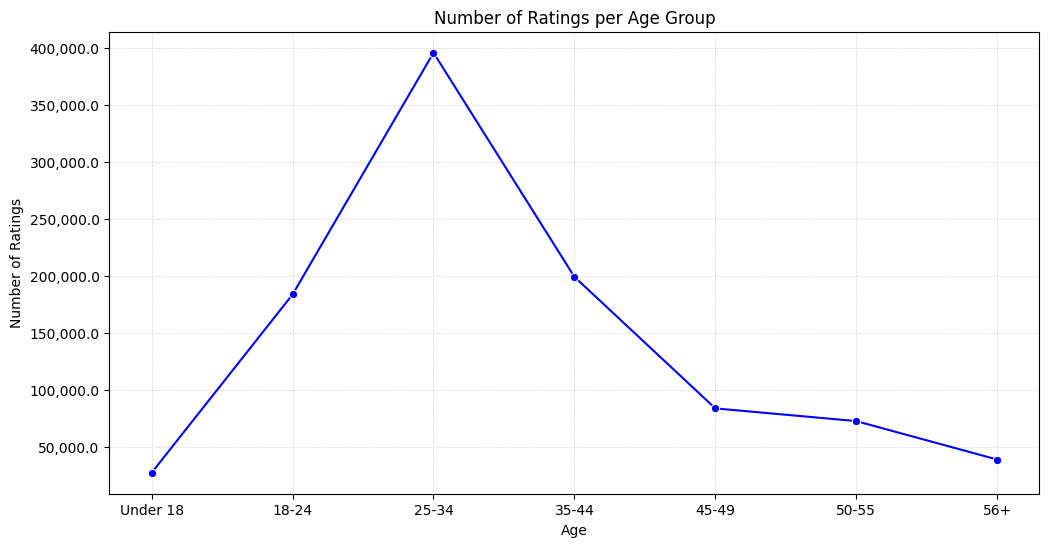

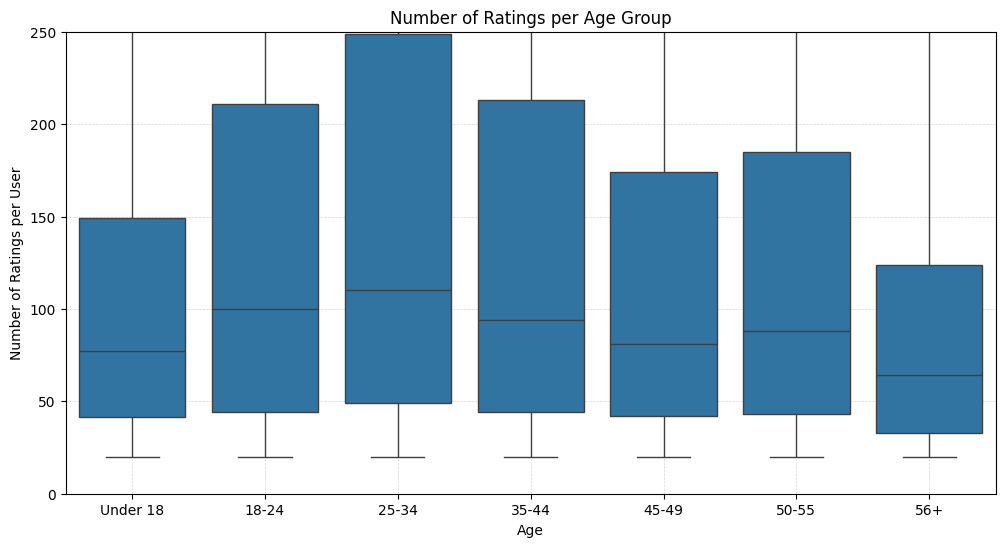

In [8]:
interactions_per_age = user_stats.groupby('age_group')['num_interactions'].sum().to_dict()
interactions_per_age = {age: interactions_per_age.get(age, 0) for age in ages_sort}


# Print percentage of ratings per age group
total_ratings = sum(interactions_per_age.values())
for age, count in interactions_per_age.items():
    percentage = (count / total_ratings) * 100 if total_ratings > 0 else 0
    print(f"Age group: {age}, Number of ratings: {count}, Percentage: {percentage:.2f}%")

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=interactions_per_age, marker='o', color='b', )
ylabels = [f'{x:,}' for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.title('Number of Ratings per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Ratings')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(ha='center')  # Rotate labels by 45 degrees and align to the right
plt.show()



plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=user_stats, x='age_group', y='num_interactions')
ax.set(ylim=(0,250))
plt.title('Number of Ratings per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Ratings per User')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(ha='center')
plt.show()

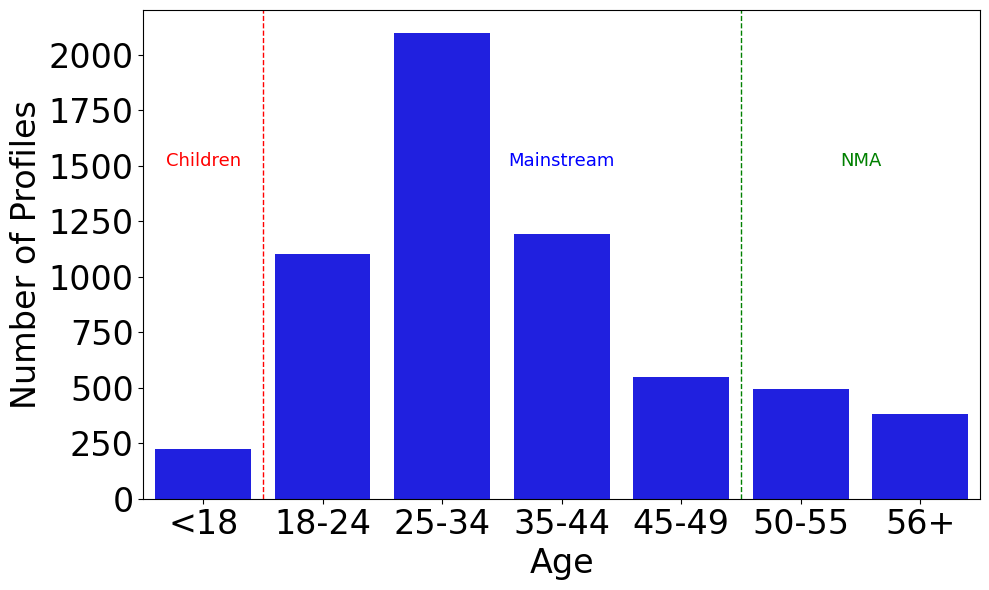

In [9]:
# For MLHD and BX
if dataset in ['mlhd', 'bx']:
    stats_grouped = user_stats.groupby('user_id')
    num_users = len(stats_grouped)
    print(f"Number of users: {num_users}")
    print(f"Number of user profiles: {len(user_stats)}")

    num_profiles = {user_id: len(group) for user_id, group in stats_grouped}
    avg_num_profiles = sum(num_profiles.values()) / len(num_profiles)
    min_num_profiles = min(num_profiles.values())
    max_num_profiles = max(num_profiles.values())
    print(f"Average number of profiles: {avg_num_profiles}")
    print(f"Minimum number of profiles: {min_num_profiles}")
    print(f"Maximum number of profiles: {max_num_profiles}")
    print(f"Number of users with more than 1 profile: {sum(1 for num in num_profiles.values() if num > 1)}")
    print(f"Number of users with more than 5 profiles: {sum(1 for num in num_profiles.values() if num > 5)}")
    print(f"Number of users with more than 10 profiles: {sum(1 for num in num_profiles.values() if num > 10)}")

    profile_sizes = {user_id: group['num_interactions'].tolist() for user_id, group in stats_grouped}
    avg_profile_size = sum(sum(sizes) / len(sizes) for sizes in profile_sizes.values()) / len(profile_sizes)
    avg_listen_events_per_user = sum(sum(sizes) for sizes in profile_sizes.values()) / len(profile_sizes)
    print(f"Average profile size: {avg_profile_size}")
    print(f"Average interactions per user: {avg_listen_events_per_user}")
    print(f"Minimum profile size: {min(min(sizes) for sizes in profile_sizes.values())}")
    print(f"Maximum profile size: {max(max(sizes) for sizes in profile_sizes.values())}")
    print(f"Number of profiles with more than 1 listen event: {sum(sum(1 for size in sizes if size > 1) for sizes in profile_sizes.values())}")
    print(f"Number of profiles with more than 5 interactions: {sum(sum(1 for size in sizes if size > 5) for sizes in profile_sizes.values())}")
    print(f"Number of profiles with more than 10 interactions: {sum(sum(1 for size in sizes if size > 10) for sizes in profile_sizes.values())}")


    ages = user_stats['age'].astype(int).value_counts().to_dict()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(ages.keys()), y=list(ages.values()), color='b')

    if dataset == 'bx':
        # Needs to be adapted for the dataset

        plt.axvline(x=5.5, color='red', linestyle='--', linewidth=1)
        plt.axvline(x=37.5, color='green', linestyle='--', linewidth=1)
        plt.text(2.5, 1125, 'Children', color='red', fontsize=13, ha='center')
        plt.text(20, 1125, 'Mainstream', color='blue', fontsize=13, ha='center')
        plt.text(45, 1125, 'NMA', color='green', fontsize=13, ha='center')

    elif dataset == 'mlhd':
        plt.axvline(x=4.5, color='red', linestyle='--', linewidth=1)
        plt.axvline(x=17.5, color='green', linestyle='--', linewidth=1)
        plt.text(2, 19000, 'Children', color='red', fontsize=13, ha='center')
        plt.text(13, 19000, 'Mainstream', color='blue', fontsize=13, ha='center')
        plt.text(25, 19000, 'NMA', color='green', fontsize=13, ha='center')
        
    #plt.title('Number of Profiles per Age Group')
    plt.xlabel('Age', fontsize=24)
    plt.ylabel('Number of Profiles', fontsize=24)
    # Create a list of x-tick positions. Start with the minimum age and add every 5 years.
    #ages_to_display = [0, 3] + list(range(3, int(max(ages.keys()))-10, 5))
    ages_to_display = [3] + list(range(3, int(max(ages.keys()))-10, 5))
    
    # Ensure that the x-ticks only show the desired ages
    plt.xticks(ticks=ages_to_display, fontsize=24)
    plt.yticks(fontsize=24)
    plt.tight_layout()

    
elif dataset == 'ml':
    # For ML
    ages = user_stats['age_group'].value_counts().to_dict()
    ages = {age: ages.get(age, 0) for age in ages_sort}
    ages = {'<18': ages.pop('Under 18'), **ages}
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(ages.keys()), y=list(ages.values()), color='b')
    plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)
    plt.axvline(x=4.5, color='green', linestyle='--', linewidth=1)
    plt.text(0, 1500, 'Children', color='red', fontsize=13, ha='center')
    plt.text(3, 1500, 'Mainstream', color='blue', fontsize=13, ha='center')
    plt.text(5.5, 1500, 'NMA', color='green', fontsize=13, ha='center')


    #plt.title('Number of Profiles per Age Group')
    plt.xlabel('Age', fontsize=24)
    plt.ylabel('Number of Profiles', fontsize=24)
    # Ensure that the x-ticks only show the desired ages
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.tight_layout()
    
plt.savefig(f'Results/Detailed_Profile_Age_Distribution_{dataset}.pdf', format='pdf')
plt.show()

In [10]:
print(f"Number of users: {len(users)}")
print(f"Number of interactions: {user_stats['num_interactions'].sum()}")
items = pd.read_csv(items_path, sep='\t')
print(f"Number of items: {len(items)}")
if dataset == 'mlhd':
    artists = pd.read_csv(artists_path, sep='\t')
    print(f"Number of artists: {len(artists)}")

Number of users: 6040
Number of interactions: 1000208
Number of items: 3706


In [11]:
user_stats

,user_id,age,num_interactions,num_unique_items,normalized_genre_distribution,avg_popularity,avg_normalized_popularity,avg_age_group_popularity,avg_normalized_age_group_popularity,age_group
0,1,1,52,52,"{'Animation': 0.13525641025641025, 'Children's...",1124.500000,0.328034,42.115385,0.376030,Under 18
1,2,56,129,129,"{'Drama': 0.3820413436692507, 'Romance': 0.069...",1012.782946,0.295444,122.232558,0.282946,56+
2,3,25,51,51,"{'Comedy': 0.3552287581699347, 'Action': 0.153...",1376.784314,0.401629,1195.176471,0.411562,25-34
3,4,45,21,21,"{'Drama': 0.13253968253968257, 'Action': 0.376...",1708.809524,0.498486,1471.952381,0.506871,45-49
4,5,25,198,198,"{'Adventure': 0.015151515151515152, 'Animation...",753.186869,0.219716,657.419192,0.226384,25-34
...,...,...,...,...,...,...,...,...,...,...
6035,6036,25,888,888,"{'Drama': 0.2930555555555556, 'Comedy': 0.1823...",580.103604,0.169225,500.975225,0.172512,25-34
6036,6037,45,202,202,"{'Action': 0.0476072607260726, 'Sci-Fi': 0.078...",932.500000,0.272025,787.712871,0.271251,45-49
6037,6038,56,20,20,"{'Drama': 0.2583333333333333, 'Romance': 0.109...",1030.700000,0.300671,121.800000,0.281944,56+
6038,6039,45,123,123,"{'Animation': 0.03617886178861789, 'Children's...",745.097561,0.217356,615.967480,0.212110,45-49
